In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
df = pd.read_csv('dataset/yahoo_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


# Data Exploration (EDA)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [3]:
df.isnull().sum() #missing value checking

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [9]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


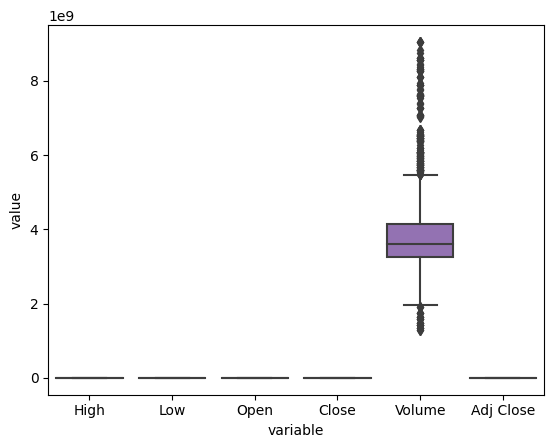

In [8]:
# outliers checking
numerical = df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]

sns.boxplot(x="variable", y="value", data=pd.melt(numerical))

plt.show()

Distribution plot of: High


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


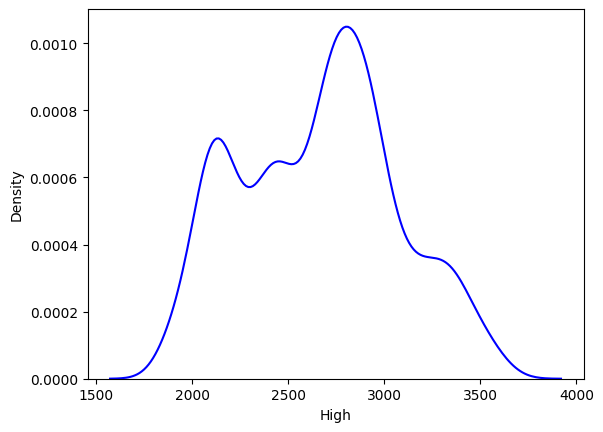

Distribution plot of: Low


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


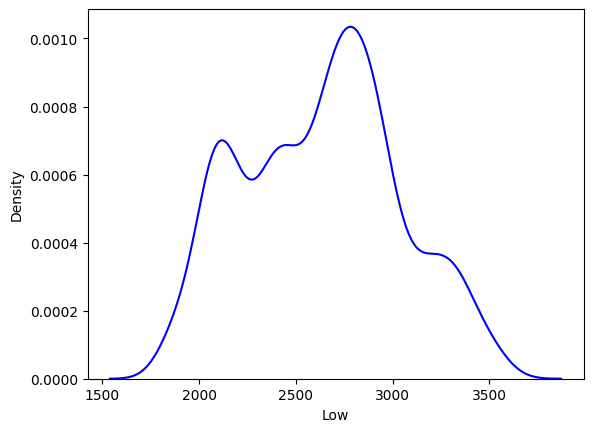

Distribution plot of: Open


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


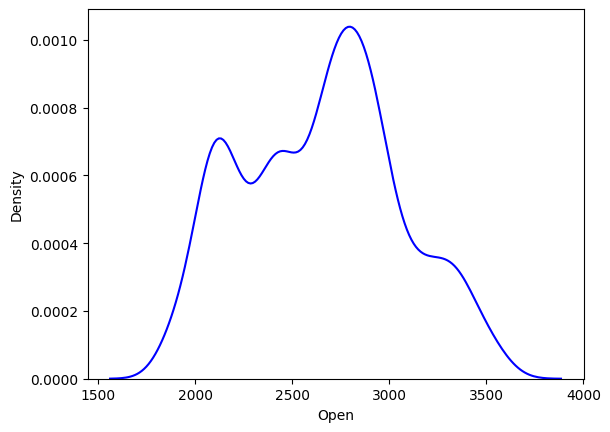

Distribution plot of: Close


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


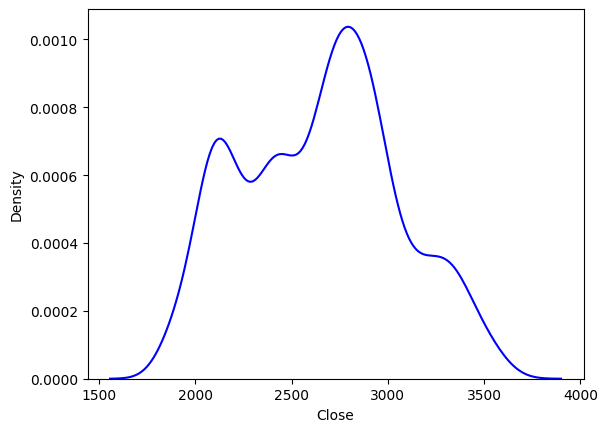

Distribution plot of: Volume


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


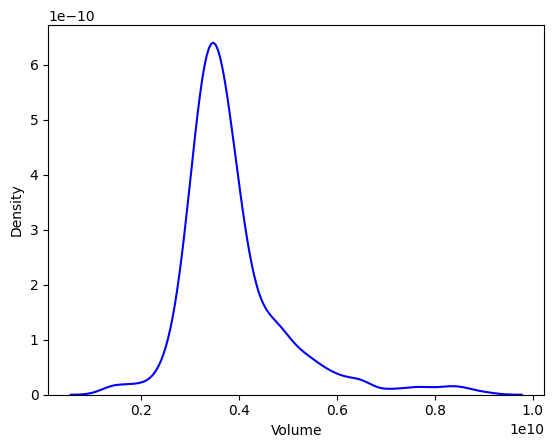

Distribution plot of: Adj Close


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


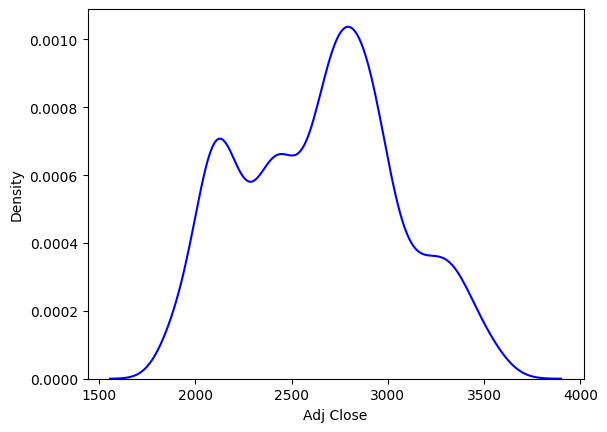

In [12]:
# numerical column distribution

for i, var in enumerate(numerical):
    print('Distribution plot of:', var)
    sns.despine(left=True)
    sns.distplot(numerical[var], hist=False, color="b")
    plt.show()

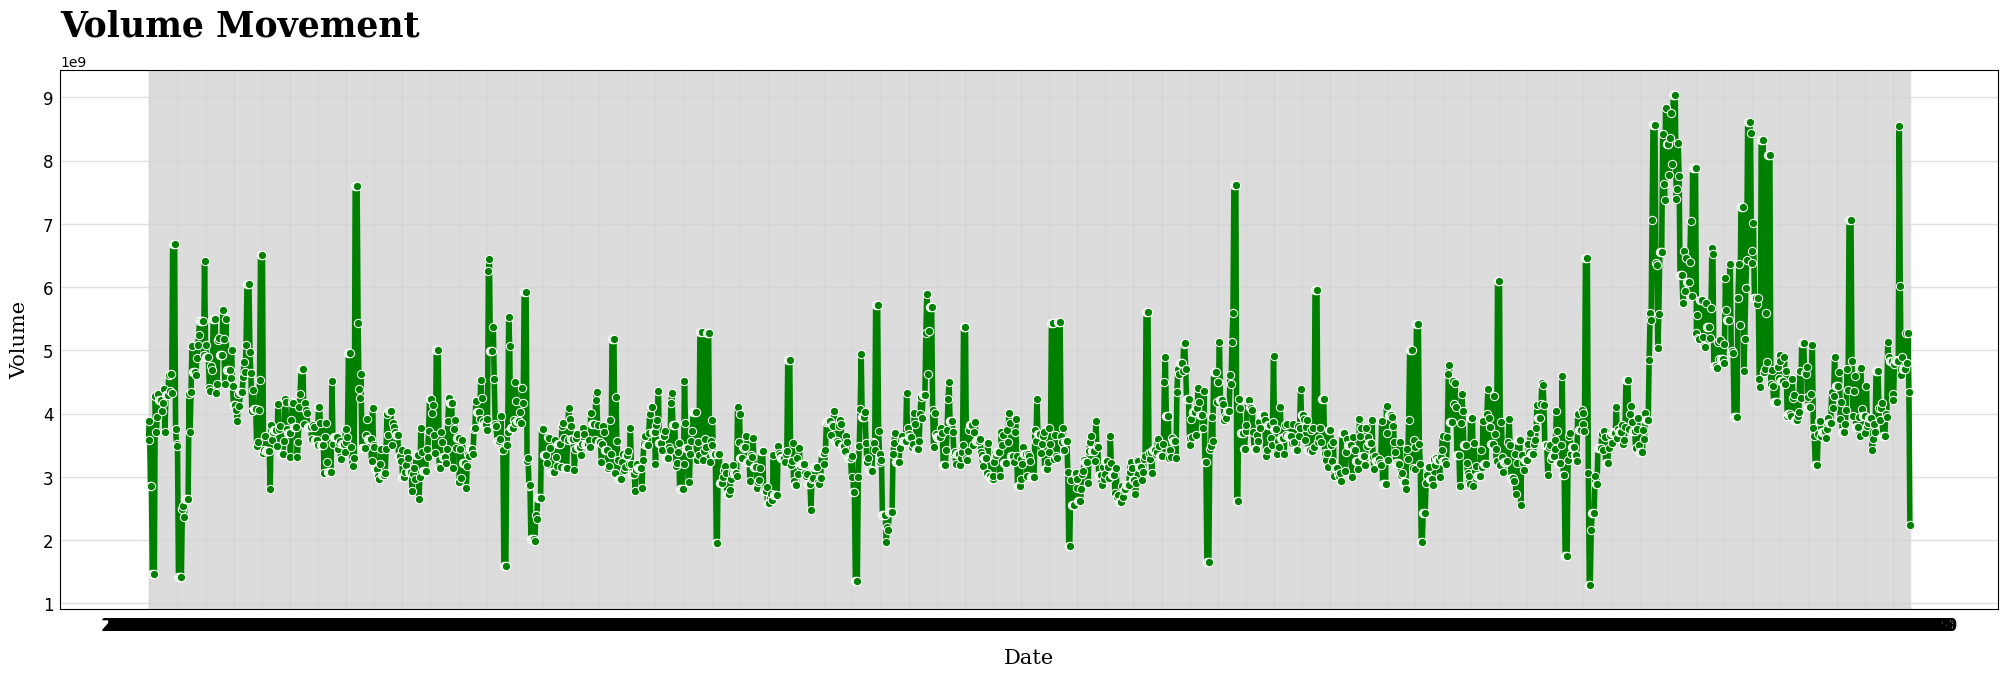

In [15]:
# draw line plot volume
fig = plt.figure(figsize=(25, 7))
fig.set_facecolor("#fff")
ax = fig.add_subplot()
ax.set_facecolor("#fff")
ax.grid(color="lightgrey", alpha=0.7, linewidth=1, axis="both", zorder=0)
sns.lineplot(x="Date", y="Volume", color="green", marker='o', err_style=None, data=df, linewidth=4, ax=ax, zorder=2)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_ylabel("Volume", fontsize=15, fontfamily="serif", labelpad=10)
ax.set_xlabel("Date", fontsize=15, fontfamily="serif", labelpad=10)
ax.xaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_title("Volume Movement", loc="left", color="#000", fontsize=25, pad=5, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
fig.show()

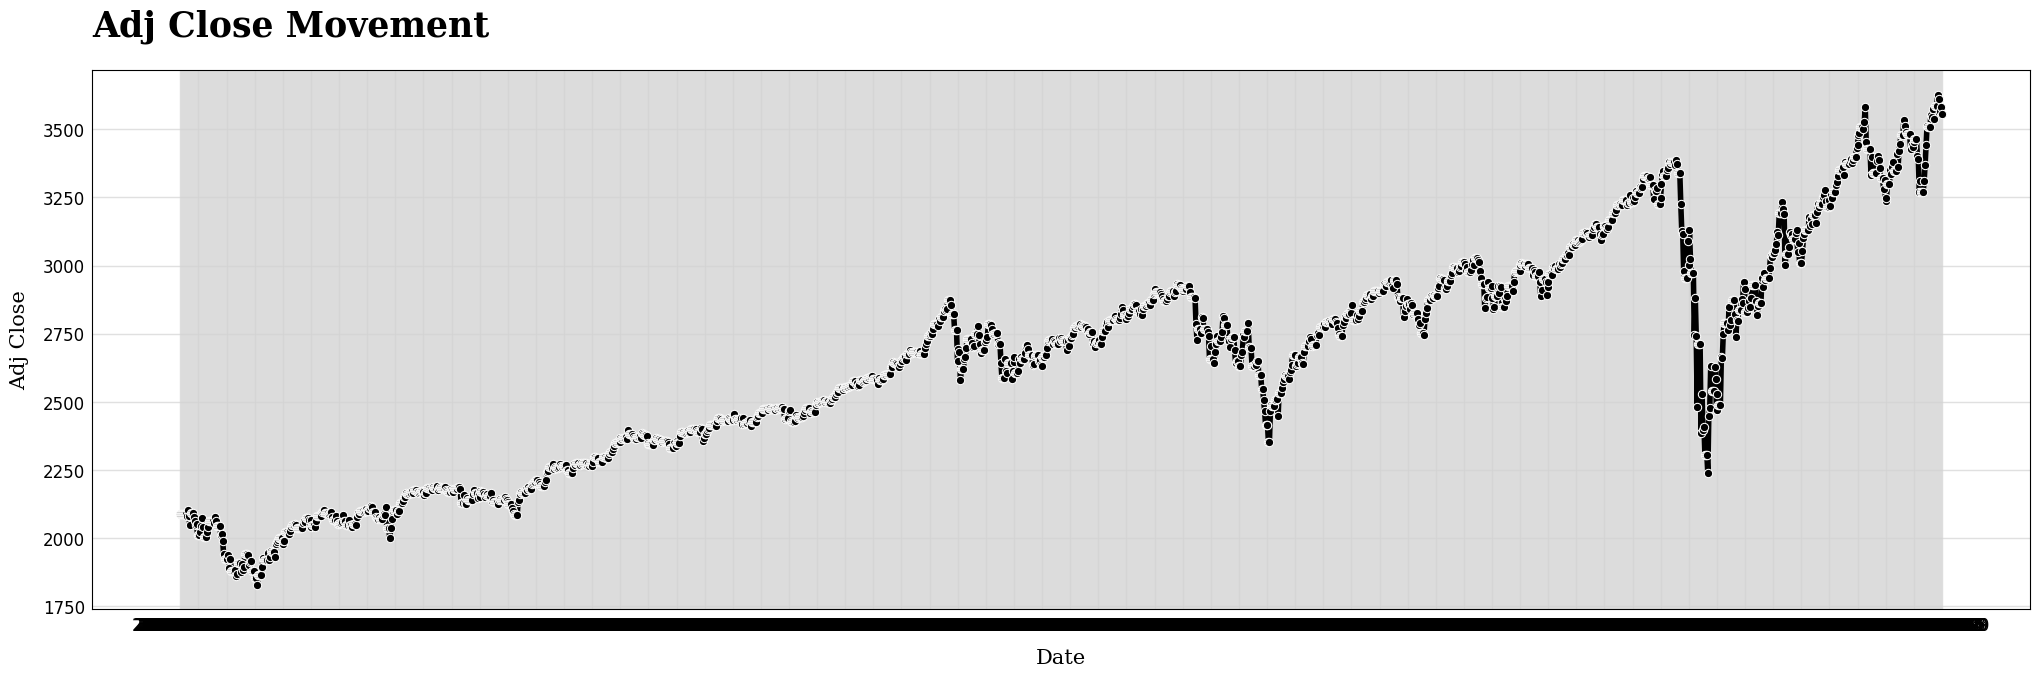

In [14]:
# draw line plot of Adj close
fig = plt.figure(figsize=(25, 7))
fig.set_facecolor("#fff")
ax = fig.add_subplot()
ax.set_facecolor("#fff")
ax.grid(color="lightgrey", alpha=0.7, linewidth=1, axis="both", zorder=0)
sns.lineplot(x="Date", y="Adj Close", color="black", marker='o', err_style=None, data=df, linewidth=4, ax=ax, zorder=2)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_ylabel("Adj Close", fontsize=15, fontfamily="serif", labelpad=10)
ax.set_xlabel("Date", fontsize=15, fontfamily="serif", labelpad=10)
ax.xaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.yaxis.set_tick_params(color="#000", labelsize=12, pad=5, length=0)
ax.set_title("Adj Close Movement", loc="left", color="#000", fontsize=25, pad=5, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
fig.show()

# Column Selection

In [3]:
df_selected = df[['Date', 'Adj Close']]
df_selected = df_selected.set_index('Date')
df_selected.tail() #in this case we're performing univariate time series

,Adj Close
Date,
2020-11-16,3626.909912
2020-11-17,3609.530029
2020-11-18,3567.790039
2020-11-19,3581.870117
2020-11-20,3557.540039


In [4]:
df_selected.shape

(1825, 1)

# Data Preprocessing

In [4]:
# function for windowing dataset
def create_dataset(orig_dataset, window_size=1):
    data_x, data_y = [], []
    for i in range(len(orig_dataset) - window_size - 1):
        window = orig_dataset.iloc[i:(i + window_size), 0]
        target = orig_dataset.iloc[i + window_size, 0]
        data_x.append(window)
        data_y.append(target)
    return np.array(data_x), np.array(data_y)

In [5]:
# data splitting into ratio of 0.7, 0.15, 0.15
# length: 1825, training 0:1276, validation [1277:1551], test [1552:1825]
train, validation, test = df_selected[:1279], df_selected[1280:1552], df_selected[1553:]
print(train.shape, validation.shape, test.shape)

(1279, 1) (272, 1) (272, 1)


In [6]:
# scaling the training set
# fitting
scaler = preprocessing.StandardScaler().fit(train)
print(scaler)

# transforming
train_scaled = scaler.transform(train)
valid_scaled = scaler.transform(validation)
test_scaled = scaler.transform(test)

StandardScaler()


In [8]:
train_scaled

array([[-1.24080053],
       [-1.23226511],
       [-1.23316818],
       ...,
       [ 1.33568855],
       [ 1.22177367],
       [ 1.23456127]])

In [7]:
# windowing dataset
window_size = 9
X_train, y_train = create_dataset(train, window_size)
X_valid, y_valid = create_dataset(validation, window_size)
X_test, y_test = create_dataset(test, window_size)

In [8]:
# reshaping
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_valid_reshaped = np.reshape(X_valid, (X_valid.shape[0], 1, X_valid.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [9]:
print(X_train_reshaped.shape, X_valid_reshaped.shape, X_test_reshaped.shape)

(1269, 1, 9) (262, 1, 9) (262, 1, 9)


# Initial Model with Simple RNN

In [12]:
# contruct Simple RNN model
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(1,window_size)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# model compiling
model.compile(
    loss='mean_squared_error',
    optimizer='RMSProp'
)

# model training
model.fit(X_train_reshaped,
          y_train,
          epochs=180)

Epoch 1/180
40/40 [==============================] - 3s 4ms/step - loss: 183121.8438
Epoch 2/180
40/40 [==============================] - 0s 5ms/step - loss: 22128.5859
Epoch 3/180
40/40 [==============================] - 0s 4ms/step - loss: 20338.0273
Epoch 4/180
40/40 [==============================] - 0s 4ms/step - loss: 16096.9531
Epoch 5/180
40/40 [==============================] - 0s 4ms/step - loss: 14097.3145
Epoch 6/180
40/40 [==============================] - 0s 4ms/step - loss: 11364.2354
Epoch 7/180
40/40 [==============================] - 0s 4ms/step - loss: 11636.7021
Epoch 8/180
40/40 [==============================] - 0s 4ms/step - loss: 9467.6807
Epoch 9/180
40/40 [==============================] - 0s 4ms/step - loss: 9783.5449
Epoch 10/180
40/40 [==============================] - 0s 4ms/step - loss: 9204.5029
Epoch 11/180
40/40 [==============================] - 0s 4ms/step - loss: 7892.7153
Epoch 12/180
40/40 [==============================] - 0s 4ms/step - loss: 747

40/40 [==============================] - 0s 3ms/step - loss: 2415.8811
Epoch 99/180
40/40 [==============================] - 0s 3ms/step - loss: 2565.2739
Epoch 100/180
40/40 [==============================] - 0s 3ms/step - loss: 2442.4707
Epoch 101/180
40/40 [==============================] - 0s 3ms/step - loss: 2576.8005
Epoch 102/180
40/40 [==============================] - 0s 3ms/step - loss: 2267.2688
Epoch 103/180
40/40 [==============================] - 0s 3ms/step - loss: 2421.4736
Epoch 104/180
40/40 [==============================] - 0s 3ms/step - loss: 2399.1138
Epoch 105/180
40/40 [==============================] - 0s 3ms/step - loss: 2248.1008
Epoch 106/180
40/40 [==============================] - 0s 3ms/step - loss: 2471.9807
Epoch 107/180
40/40 [==============================] - 0s 3ms/step - loss: 1942.8087
Epoch 108/180
40/40 [==============================] - 0s 4ms/step - loss: 2563.2834
Epoch 109/180
40/40 [==============================] - 0s 3ms/step - loss: 2338.

In [14]:
# Make predictions on all three sets
train_pred_m1 = model.predict(X_train_reshaped)
valid_pred_m1 = model.predict(X_valid_reshaped)
test_pred_m1 = model.predict(X_test_reshaped)

print(mean_squared_error(y_train, train_pred_m1), " --> MSE in Training Set")
print(mean_squared_error(y_valid, valid_pred_m1), " --> MSE in Validation Set")
print(mean_squared_error(y_test, test_pred_m1), " --> MSE in Test Set")

print(r2_score(y_train, train_pred_m1), " --> R^2 score in Training Set")
print(r2_score(y_valid, valid_pred_m1), " --> R^2 score in Validation Set")
print(r2_score(y_test, test_pred_m1), " --> R^2 score in Test Set")

9/9 [==============================] - 0s 2ms/step
781.5733500493263  --> MSE in Training Set
1126.4192082233556  --> MSE in Validation Set
5960.18538361674  --> MSE in Test Set
0.9912057202000429  --> R^2 score in Training Set
0.9498670875958912  --> R^2 score in Validation Set
0.9380761959103862  --> R^2 score in Test Set


# LSTM Model

In [15]:
# model constructing
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.LSTM(64, activation='relu', input_shape=(1,window_size)))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(1))

# model compiling
model_2.compile(
    loss='mse',
    optimizer='RMSProp'
)

# model training
model_2.fit(X_train_reshaped,
            y_train,
            epochs=180)

Epoch 1/180
40/40 [==============================] - 3s 5ms/step - loss: 970728.8125
Epoch 2/180
40/40 [==============================] - 0s 5ms/step - loss: 21537.2051
Epoch 3/180
40/40 [==============================] - 0s 5ms/step - loss: 20094.8418
Epoch 4/180
40/40 [==============================] - 0s 5ms/step - loss: 19262.1602
Epoch 5/180
40/40 [==============================] - 0s 5ms/step - loss: 17033.8086
Epoch 6/180
40/40 [==============================] - 0s 7ms/step - loss: 17667.7988
Epoch 7/180
40/40 [==============================] - 0s 5ms/step - loss: 15553.8818
Epoch 8/180
40/40 [==============================] - 0s 4ms/step - loss: 15196.6426
Epoch 9/180
40/40 [==============================] - 0s 5ms/step - loss: 14851.0088
Epoch 10/180
40/40 [==============================] - 0s 4ms/step - loss: 16559.5547
Epoch 11/180
40/40 [==============================] - 0s 5ms/step - loss: 15424.2266
Epoch 12/180
40/40 [==============================] - 0s 4ms/step - loss:

40/40 [==============================] - 0s 5ms/step - loss: 7739.7114
Epoch 99/180
40/40 [==============================] - 0s 4ms/step - loss: 6727.8857
Epoch 100/180
40/40 [==============================] - 0s 4ms/step - loss: 7357.4688
Epoch 101/180
40/40 [==============================] - 0s 4ms/step - loss: 7853.8818
Epoch 102/180
40/40 [==============================] - 0s 4ms/step - loss: 6847.9990
Epoch 103/180
40/40 [==============================] - 0s 4ms/step - loss: 7270.0825
Epoch 104/180
40/40 [==============================] - 0s 5ms/step - loss: 7400.4624
Epoch 105/180
40/40 [==============================] - 0s 4ms/step - loss: 7177.7988
Epoch 106/180
40/40 [==============================] - 0s 4ms/step - loss: 7201.8008
Epoch 107/180
40/40 [==============================] - 0s 4ms/step - loss: 6869.6406
Epoch 108/180
40/40 [==============================] - 0s 4ms/step - loss: 6791.1440
Epoch 109/180
40/40 [==============================] - 0s 4ms/step - loss: 7512.

In [16]:
# Make predictions on all three sets
train_pred_m2 = model_2.predict(X_train_reshaped)
valid_pred_m2 = model_2.predict(X_valid_reshaped)
test_pred_m2 = model_2.predict(X_test_reshaped)

print(f"MSE in train set: {mean_squared_error(y_train, np.round(train_pred_m2))}")
print(f"MSE in validation set: {mean_squared_error(y_valid, np.round(valid_pred_m2))}")
print(f"MSE in test set: {mean_squared_error(y_test, np.round(test_pred_m2))}")

print(f"R^2 Score in train set: {r2_score(y_train, (train_pred_m2))}")
print(f"R^2 Score in validation set: {r2_score(y_valid, (valid_pred_m2))}")
print(f"R^2 Score in test set: {r2_score(y_test, (test_pred_m2))}")

9/9 [==============================] - 0s 2ms/step
MSE in train set: 3669.5491797756476
MSE in validation set: 6243.123028449657
MSE in test set: 13620.969650246941
R^2 Score in train set: 0.9586984174663385
R^2 Score in validation set: 0.7221716363522812
R^2 Score in test set: 0.8585215220921552


# Third model - Convolutional layer

In [17]:
# model constructing
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=(1,window_size)))
model_3.add(tf.keras.layers.MaxPooling1D(1))
model_3.add(tf.keras.layers.LSTM(128, activation='relu'))
model_3.add(tf.keras.layers.Dense(256, activation='relu'))
model_3.add(tf.keras.layers.Dense(256, activation='relu'))
model_3.add(tf.keras.layers.Dense(1))

# model compiling
model_3.compile(
    loss = 'mse',
    optimizer = 'RMSProp')

# model training
model_3.fit(X_train_reshaped,
            y_train,
            epochs=120)

Epoch 1/120
40/40 [==============================] - 3s 8ms/step - loss: 397179.0000
Epoch 2/120
40/40 [==============================] - 0s 8ms/step - loss: 62897.9844
Epoch 3/120
40/40 [==============================] - 0s 8ms/step - loss: 53784.9062
Epoch 4/120
40/40 [==============================] - 0s 8ms/step - loss: 42420.6562
Epoch 5/120
40/40 [==============================] - 0s 8ms/step - loss: 46726.2734
Epoch 6/120
40/40 [==============================] - 0s 8ms/step - loss: 38179.8164
Epoch 7/120
40/40 [==============================] - 0s 9ms/step - loss: 34085.0703
Epoch 8/120
40/40 [==============================] - 0s 9ms/step - loss: 34780.1719
Epoch 9/120
40/40 [==============================] - 0s 9ms/step - loss: 29107.7793
Epoch 10/120
40/40 [==============================] - 0s 10ms/step - loss: 37472.6094
Epoch 11/120
40/40 [==============================] - 0s 9ms/step - loss: 30297.5820
Epoch 12/120
40/40 [==============================] - 0s 9ms/step - loss

40/40 [==============================] - 0s 8ms/step - loss: 9550.9121
Epoch 98/120
40/40 [==============================] - 0s 7ms/step - loss: 8403.9834
Epoch 99/120
40/40 [==============================] - 0s 7ms/step - loss: 8521.3457
Epoch 100/120
40/40 [==============================] - 0s 7ms/step - loss: 9684.1504
Epoch 101/120
40/40 [==============================] - 0s 8ms/step - loss: 8793.9062
Epoch 102/120
40/40 [==============================] - 0s 8ms/step - loss: 8890.0303
Epoch 103/120
40/40 [==============================] - 0s 8ms/step - loss: 9479.7373
Epoch 104/120
40/40 [==============================] - 0s 8ms/step - loss: 8864.6436
Epoch 105/120
40/40 [==============================] - 0s 8ms/step - loss: 8634.5537
Epoch 106/120
40/40 [==============================] - 0s 8ms/step - loss: 9403.1963
Epoch 107/120
40/40 [==============================] - 0s 8ms/step - loss: 9097.7412
Epoch 108/120
40/40 [==============================] - 0s 8ms/step - loss: 8736.2

In [18]:
# Make predictions on all three sets
train_pred_m3 = model_3.predict(X_train_reshaped)
valid_pred_m3 = model_3.predict(X_valid_reshaped)
test_pred_m3 = model_3.predict(X_test_reshaped)

print(mean_squared_error(y_train, train_pred_m3), " --> MSE in Training Set")
print(mean_squared_error(y_valid, valid_pred_m3), " --> MSE in Validation Set")
print(mean_squared_error(y_test, test_pred_m3), " --> MSE in Test Set")

print(r2_score(y_train, train_pred_m3), " --> R^2 score in Training Set")
print(r2_score(y_valid, valid_pred_m3), " --> R^2 score in Validation Set")
print(r2_score(y_test, test_pred_m3), " --> R^2 score in Test Set")

9/9 [==============================] - 0s 5ms/step
7830.924524916637  --> MSE in Training Set
10063.17881333828  --> MSE in Validation Set
16592.409228268698  --> MSE in Test Set
0.9118862722735922  --> R^2 score in Training Set
0.552123704680349  --> R^2 score in Validation Set
0.8276118891787677  --> R^2 score in Test Set


## Some Notes

**Simple RNN** perform better than LSTM and Conv1D, because R^2 Score in train, validation, and test sets stay constant in 0.93-0.99.

**Why do we use R^2 as evaluation metric?** Because when using data where the target variable has been scaled (as is common with time series data), a normalized metric like R-Squared may be more helpful since it is not affected by the scale of the data.

However, we **still can't considering** Simple RNN model as **the best model** in predicting Adj Close as we haven't optimized it. Let's enhance it later

# Visualizing result

In [24]:
# Un-scale the predictions
train_pred = scaler.inverse_transform(train_pred_m1)
valid_pred = scaler.inverse_transform(valid_pred_m1)
test_pred = scaler.inverse_transform(test_pred_m1)

# Load in the selected, cleaned df (for comparison)
df_selected

# Un-window the training predictions
plot_train_pred = np.empty((len(df_selected), 1))
plot_train_pred[:] = np.nan
plot_train_pred[window_size:len(train_pred) + window_size, :] = train_pred

# Un-window the validation predictions
plot_valid_pred = np.empty((len(df_selected), 1))
plot_valid_pred[:] = np.nan
plot_valid_pred[len(train_pred) + (window_size * 2) + 1:len(train_pred) + len(valid_pred) + (window_size * 2)] = valid_pred

# Un-window the test predictions
plot_test_pred = np.empty((len(df_selected), 1))
plot_test_pred[:] = np.nan
plot_test_pred[len(train_pred) + len(valid_pred) + (window_size * 3) + 2:len(df_selected) - 1, :] = test_pred

# Plot the original data
plt.plot(df_selected, label="Original Data")

# Plot the predictions
plt.plot(plot_train_pred, label="Training Set Predictions")
plt.plot(plot_valid_pred, label="Validation Set Predictions")
plt.plot(plot_test_pred, label="Test Set Predictions")

# Add title, axis labels, and a legend
plt.title('Yahoo Stock Forecast')
plt.xlabel('Date')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
plt.ylabel('Adjusted Closed')
plt.legend()

ValueError: could not broadcast input array from shape (262,1) into shape (261,1)

**Gonna resolve this error soon :)**